<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

#  Load dataset

In [4]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# categorical variables
# MODELYEAR, MAKE, MODEL,VEHICLECLASS,TRANSMISSION, FUELTYPE
# have to do Feature Engineering/Data Transformation to use these features if we want to use in Linear Regression Model. 

In [10]:
# run Stats model
# OLS(Ordinary Least Squared) Regression Results

statMDL=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:36:17   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### - R-squared- OLS Results এ R-squared মান 0.889 দেয়া আছে এর অর্থ আমাদের রিগ্রেশন লাইন প্রায় 88.9% ফিচার ভ্যারিয়বলকে টাচ করতে পারে অথবা 88.9% ফিট হয়। এটাকে অন্য ভাবেও বলা যায় টার্গেট ভ্যারিয়েবলের মানকে এই মডেলের মাধ্যমে 88.9 % ব্যখ্যা করা যায়। 
### - Adj. R-squared-  আমরা ইনপুট ভ্যারিয়েবলের সংখ্যা যত বাড়াতে থাকবো R-squared এর মান ততোই বাড়তে থাকবে। তবে সবসময় R-squared এর মান বাড়লেই যে মডেল আরও ভালো হতে থাকবে এমনটি নয়। আমরা যখন দেখবো নতুন কোন ফিচার ভ্যারিয়েবল যোগ করলে R-squared বাড়ে কিন্তু Adj. R-squared এর মান আগের মতই থেকে যায় অথবা Adj. R-squared এর মান R-squared চেয়ে ছোট হয় তখন বুঝতে হবে নতুন ভ্যারিয়েবল মডেলের পারফরম্যান্স প্রকৃতপক্ষে বাড়াবে না। 
### - Prob (F-statistic)- Prob (F-statistic) এর মান যদি 0.05 এর থেকে বেশী হয় তবে আমাদের মডেলটি রিগ্রেশনের জন্য মটেই ভালো নয়। Prob (F-statistic) মান সবসময় 0.05 এর থেকে কম থাকা বাঞ্ছনীয়। 
### - P>|t| - যেসকল কোএফিসিয়েন্টের P>|t| এর মান 0.05 এর থেকে বেশী , সেসকল কোএফিসিয়েন্ট সমূহ যেসকল ভ্যারিয়েবলের , ঐ সকল ভ্যারিয়েবল মডেলে তেমন কোন গুরুত্ব বহন করবে না।  অর্থাৎ এদেরকে বাদ দেয়া যেতে পারে।  আমাদের মডেলে FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY এবং FUELCONSUMPTION_COMB এর P>|t| এর মান 0.05 এর থেকে বড়, সুতরাং এরা আমাদের মডেলের জন্য গুরুত্বপূর্ণ নয়। 
### - Df Model- মডেলে যে কয়টি ইন্ডিপেন্ডেন্ট / ফিচার ভ্যারিয়েবল ব্যবহার করা হয়েছে। 
### - Dep. Variable-  মডেলের ডিপেন্ডেন্ট / টার্গেট ভ্যারিয়েবল 

In [13]:
# আমরা OLS Regression Results অনুযায়ী গুরুত্বপূর্ণ ভ্যারিয়েবল সমূহের সমন্বয়ে ফিচার x এবং টার্গেট  y সেট করে নেবো
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [15]:
# এবার টেস্ট এর জন্য ২৫% ডেটা রেখে বাকি ডেটা দিয়ে মডেল ট্রেইন করবো। আমরা এই মডেলের নাম দিয়েছি lr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Now model is ready for Prediction. 
# আমাদের মডেল এখন প্রিডিকশন করার জন্য প্রস্তুত। আমরা এখন টেস্ট ডেটাসেটের ফিচার অংশ ইনপুট হিসাবে দিয়ে মডেলকে প্রিডিকশন করতে দেব
predictions = lr.predict(X_test)


In [21]:
# Check Accuracy
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = lr.score(X_test, y_test)
print('AccuracyII: ', accuracy*100, '%')
print('R2: ', r2_score(y_test, predictions))

Coefficients:  [11.11172826  6.34337788 -4.73059216]
Intercept:  307.1168046918609
MAE:  14.528021284008478
MSE:  487.3839241006477
RMSE  22.0767734078295
AccuracyII:  88.53480655959554 %
R2:  0.8853480655959554


### the model Accuracy is 88.53%

In [24]:
# training set accuracy
print('Train set accuracy: ', r2_score(y_train, lr.predict(X_train)))
print('Test set accuracy: ', r2_score(y_test, predictions))


Train set accuracy:  0.8827636444239391
Test set accuracy:  0.8853480655959554


<AxesSubplot:xlabel='CO2EMISSIONS'>

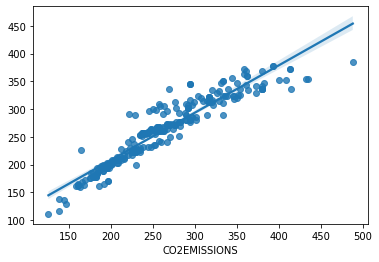

In [25]:
# Showing Prediction in test data using regression plot
sns.regplot(x=y_test, y=predictions) 

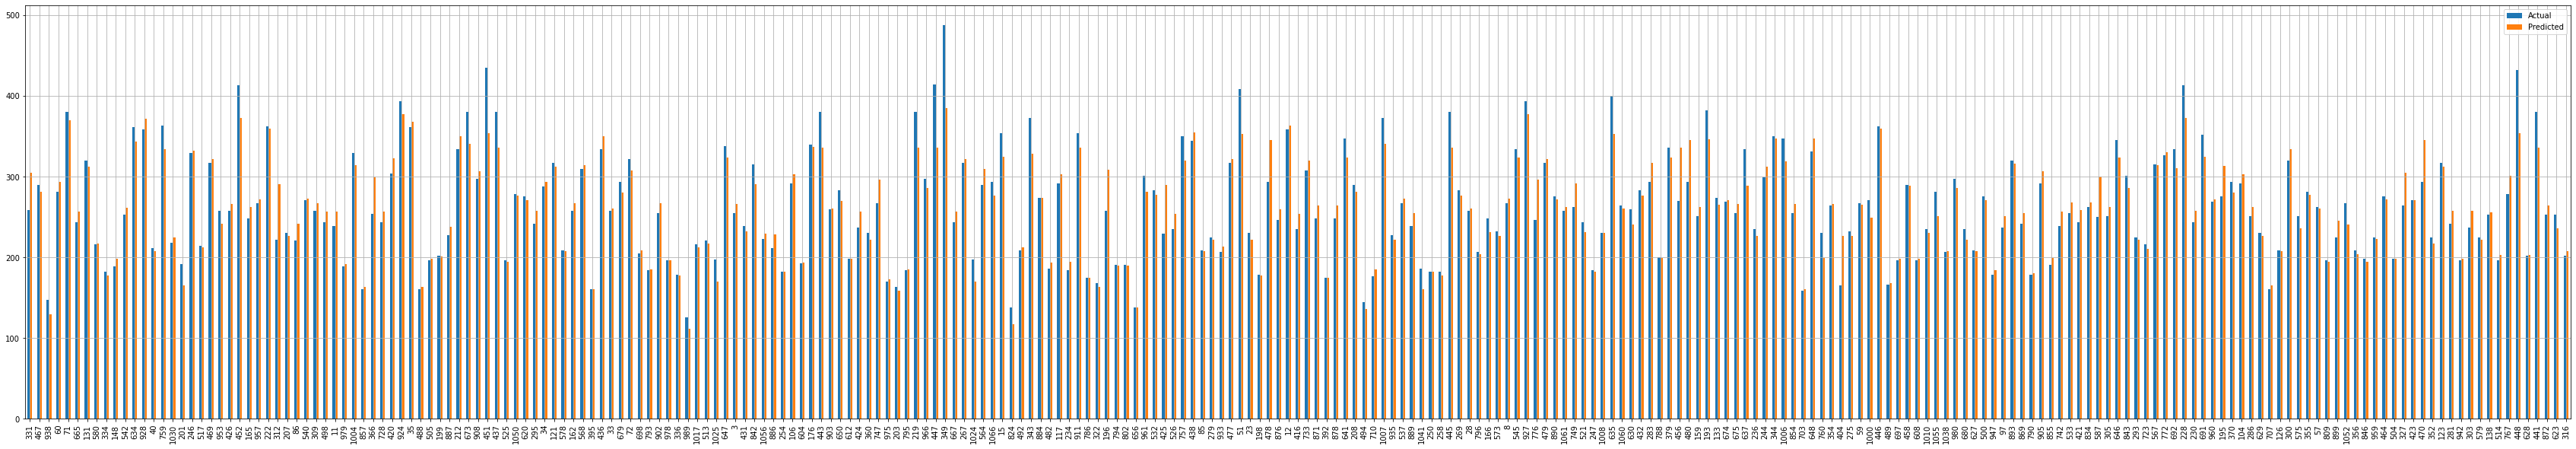

In [30]:
# comparing Original vs prediction value visualizing
# Actual vsPreticted plot
df2 = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df2.plot(kind='bar', figsize=(60,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid()
plt.show()

In [35]:
# এবার প্রিডিকশনের পালা, মনেকরি একটি গাড়ির  ENGINESIZE = 4, CYLINDERS= 4 এবং FUELCONSUMPTION_COMB_MPG=6 হলে CO2EMISSIONS কত হবে?
# let's predict. let's assume a cars ENGINESIZE = 4, CYLINDERS= 4 এবং FUELCONSUMPTION_COMB_MPG=6. then what will be the value of CO2EMISSIONS?

new_observation = [[4, 4, 6]]
print('The predicted value is: ', lr.predict(new_observation))

The predicted value is:  [348.55367627]


# The predicted value is:  [348.55367627]